In [57]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt

### Merging 12 months of sales data into a single file

Also a single csv just in case that we need it

In [42]:
mainpath = "/home/nicolasterroni/projects/cursos/data-analysis-and-machine-learning/datasets"
#csv_files = [file for files in os.listdir("mainpath")]

# We also can use:
csv_files = glob.glob(os.path.join(mainpath+"/Sales_Data/", "*.csv"))

data = pd.DataFrame()

for file in csv_files:
    new_data =  pd.read_csv(file)
    data = pd.concat([data,new_data],axis=0)
    
# remove headers
trash_data = data.loc[data['Order Date']=='Order Date'].index
data.drop(trash_data, inplace = True) 

# save all data in a single csv file
data.to_csv(mainpath+"/full_dataset/Sales_all_2019.csv",index=False)

### Clean data

In [43]:
trash_data = data.loc[data['Order Date']=='Order Date'].index
data.drop(trash_data, inplace = True) 
data = data.dropna(axis=0,how="all")

In [44]:
data['DateTime'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')
                                  
data['Month'] = data['DateTime'].dt.month
data['Month'] = data['Month'].astype('int')

data = data.drop(['Order Date'],axis=1)

data['Order ID'] = pd.to_numeric(data['Order ID'])
data['Product'] = data['Product'].astype(str)
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Purchase Address'] = data['Purchase Address'].astype(str)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,DateTime,Month
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,4
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,4
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,4
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,4


### Which was the best month for sales?

##### Group sales per month

In [45]:
grouped_by_month = data.groupby(data["Month"])
groups_keys = grouped_by_month.groups.keys()
groups_keys

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

##### Sum sales per month

In [46]:
sales_for_each_month = {}
for group in groups_keys:
    sales_for_each_month[group] = 0
    month_sales = grouped_by_month.get_group(group)
    for index, row in month_sales.iterrows():
        value = float(row['Price Each']) * int(row['Quantity Ordered'])
        sales_for_each_month[group] += round(value,2)
sales_for_each_month

{1: 1786511.289999915,
 2: 2158127.479999929,
 3: 2755969.40000032,
 4: 3336376.4200006723,
 5: 3101881.0400005206,
 6: 2524464.990000136,
 7: 2587444.910000183,
 8: 2191698.3099999647,
 9: 2050361.2599998936,
 10: 3679254.160000939,
 11: 3149785.0900005554,
 12: 4557905.420001494}

It was december with 4557905.42

##### Better solution and plot

In [58]:
# maybe this column would have helped
data['Total Amount'] = round((data['Price Each']*data['Quantity Ordered']).astype(float),2)
data.groupby("Month").sum()

,Order ID,Quantity Ordered,Price Each,Total Amount
Month,,,,
1,1391148846,10670,1776155.79,1786511.29
2,1832181724,13162,2145208.87,2158127.48
3,2520234917,16697,2740393.12,2755969.40
4,3333217539,20226,3313522.35,3336376.42
5,3289290354,18344,3084756.09,3101881.04
6,2876409942,14964,2508863.49,2524464.99
7,3224356195,15781,2572764.75,2587444.91
8,2840777365,13185,2178183.81,2191698.31
9,2886380303,12827,2038019.59,2050361.26


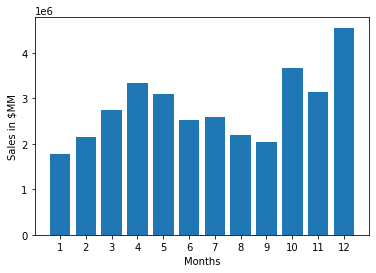

In [63]:
results = data.groupby("Month").sum()
months = range(1,13)
plt.bar(months,results["Total Amount"])
plt.xticks(months)
plt.ylabel("Sales in $MM")
plt.xlabel("Months")
plt.show()

### What city had the highest numbers of sales?